In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

Sex values as string: Male      5819
Female    1395
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    5819
1    1395
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    4666
M    2548
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    4666
0    2548
Name: c_charge_degree, dtype: int64
7214
last date of modified dataset:  2014-03-31 length of compas:  6207
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
start              0
end                0
event              0
dtype: int64
MEAN OF SCALED DATA:  [ 5.03687456e-17  2.24369867e-16  4.35002803e-17  2.63291170e-17
  2.51843728e-17 -5.17996758e-17  1.60264190e-17 -2.28948843e-17
  6.86846530e-18]
STANDARD DEVIATION OF SCALED DATA [1. 1. 1. 1. 1. 1. 1. 1. 1.]
7214


<lifelines.CoxPHFitter: fitted with 6207 total observations, 4254 right-censored observations>
             duration col = 'end'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 6207
number of events observed = 1953
   partial log-likelihood = -16029.87
         time fit was run = 2021-05-09 01:27:46 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
sex              -0.35       0.71       0.07            -0.47            -0.22                 0.62                 0.81
age              -0.04       0.96       0.00            -0.04            -0.03                 0.96                 0.97
juv_fel_count     0.04       1.04       0.04            -0.04             0.12                 0.96                 1.12
juv_misd_count   -0.04       0.96       0.04            -0.11             0.04                 0.90                 1.04
priors_count      0.09       1.09       0.00             0.08             0.10                 1.08                 1.10
c_charge_degree   0.12       1.13       0.05             0.02             0.22                 1.02                 1.24
start            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                     z      p   -log2(p)
covariate                               
sex              -5.26 <0.005      22.73
age             -15.73 <0.005     182.89
juv_fel_count     1.01   0.31       1.68
juv_misd_count   -0.99   0.32       1.64
priors_count     20.90 <0.005     319.74
c_charge_degree   2.45   0.01       6.11
start            -0.90   0.37       1.45
---
Concordance = 0.67
Partial AIC = 32073.75
log-likelihood ratio test = 671.55 on 7 df
-log2(p) of ll-ratio test = 465.16

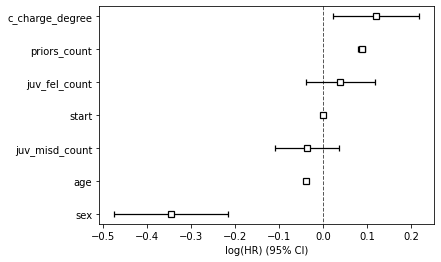

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("compas-scores-two-years.csv")
total = len(compas)

predict = 'is_recid'

#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())

print(total)
for i in range(len(compas)):
  if pd.to_datetime(compas["compas_screening_date"][i]) >= datetime.datetime(2014, 4, 1):
    compas = compas.drop([i])
print("last date of modified dataset: ", compas["compas_screening_date"].max(), "length of compas: ", len(compas))



compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'violent_recid', 'in_custody','out_custody'], axis=1)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())


x = np.array(compasfeat)
y = np.array(compas[predict])

scaler = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

epochs= 1000
print("MEAN OF SCALED DATA: ", x.mean(axis=0))
print("STANDARD DEVIATION OF SCALED DATA", x.std(axis=0))


print(len(compasfeat))


from lifelines import CoxPHFitter

for _ in range(epochs):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=.20)
  cph = CoxPHFitter()
  cph.fit(compasfeat, duration_col='end', event_col='event', step_size= .2)

cph.print_summary()

#save the model
modifiedcoxph = 'modifiedCoxPH.sav'
pickle.dump(cph, open(modifiedcoxph, 'wb'))

"""openmodifiedcoxph = pickle.load(open("modifiedCoxPH.sav", "rb"))"""
cph.plot()